In [1]:
!pip install nibabel
!pip install seaborn
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 9.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 7.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Input
from keras.layers import Convolution3D,Conv3D,Add,concatenate, MaxPool3D,add, Convolution2D,BatchNormalization, GlobalAveragePooling3D, ZeroPadding3D
from keras import backend as K
import cv2
import operator
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD
import nibabel as nib
import pandas as pd
from scipy.ndimage import rotate
import random
import nibabel as nib
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import nibabel as nib
from matplotlib import animation, rc
from scipy.ndimage import rotate
import glob
import os
from sklearn.model_selection import KFold, StratifiedKFold,train_test_split
from scipy.ndimage import zoom
from matplotlib.patches import PathPatch, Rectangle
from IPython.display import HTML

E0000 00:00:1724225795.437603      13 common_lib.cc:815] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`=local.
=== Source Location Trace: === 
learning/45eac/tfrc/runtime/common_lib.cc:531


In [3]:
# Enable TPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print("Device:", tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print("Number of accelerators: ", strategy.num_replicas_in_sync)

Device: 
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local


2024-08-21 07:36:48.705682: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-21 07:36:48.705789: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-21 07:36:48.705864: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-21 07:36:48.705936: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-21 07:36:48.706002: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-21 07:36:48.706196: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-21 07:36:48.706286: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


Number of accelerators:  8


# Model



In [4]:
def define_model():
    model = Sequential()
    model.add(Conv3D(32,(3,3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(32,32,32,1)))
    model.add(BatchNormalization())
    model.add(Conv3D(32, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool3D((2, 2,2)))

    
    model.add(Conv3D(64, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv3D(64, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool3D((2, 2,2)))
    
    model.add(Conv3D(128, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv3D(128, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool3D((2, 2,2)))
    
    model.add(Conv3D(128, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv3D(128, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv3D(128, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv3D(128, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool3D((2, 2,2)))

    model.add(Conv3D(256, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv3D(256, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))


    model.add(Dense(1, activation='sigmoid', kernel_initializer='he_uniform'));
    return model

### Luna Load

In [5]:
luna_df = pd.read_excel('/kaggle/input/spie-cropped-resampled-dataset/final_Luna16.xlsx')
column_luna = 'malignancy'
luna_series=luna_df['Series Uid'].tolist()

luna_folder = '/kaggle/input/spie-cropped-resampled-dataset/Luna_16_cropped_resampled/Luna_16_cropped_resampled'  
luna = []
for i in luna_series:
    nii_file_path = os.path.join(luna_folder, f'{i}.nii')  # Assuming NII files have the extension '.nii'
    
    if os.path.exists(nii_file_path):
        luna.append(i)
luna=np.array(luna)

print(luna.shape)

(557,)


### unlabeled load

In [6]:
# Load the Excel file for unlabeled_df
unlabeled_df = pd.read_excel('/kaggle/input/semi-testtrainval/combined_correct_predictions.xlsx')
column_unlabeled = 'malignancy'
unlabeled_series = unlabeled_df['scan'].tolist()

unlabeled_folder = '/kaggle/input/spie-cropped-resampled-dataset/Luna_16_cropped_resampled/Luna_16_cropped_resampled'
unlabeled = []
for i in unlabeled_series:
    nii_file_path = os.path.join(unlabeled_folder, f'{i}.nii')
    
    if os.path.exists(nii_file_path):
        unlabeled.append(i)
unlabeled = np.array(unlabeled)

print(unlabeled.shape)

(605,)


In [7]:
BS= 48 # batch size
E = 200 #epoch

In [8]:
def aug_rotate(x):

    rotated_slices = []
    for slice_idx in range(x.shape[2]):
        slice_data = x[:, :, slice_idx]  # Extract a single slice
        rotated_slice = rotate(slice_data, angle=angles[j], reshape=False, mode='nearest')
        rotated_slices.append(rotated_slice)

    # Create a new NIfTI image from the rotated slices
    rotated_img_data = np.stack(rotated_slices, axis=-1)
    # Create a new NIfTI image using the header information from the original image
    rotated_nifti = nib.Nifti1Image(rotated_img_data, img.affine)
    
    return rotated_nifti

split

### Load Data

In [9]:
# Specify the path to the Excel file
file_path = '/kaggle/input/semi-testtrainval/test_train_vai_set.xlsx'
# Load the Excel file
df = pd.read_excel(file_path)
# z_train

z_train = df.iloc[:, 2]    # Third column

#z_test
z_test_fixed = df.iloc[:, 0]  # First column
nan_count = z_test_fixed.isna().sum()
z_test = z_test_fixed.dropna()

#z_val
z_val_fixed = df.iloc[:, 1]  # Second column
nan_count_val = z_val_fixed.isna().sum()
z_val = z_val_fixed.dropna()


In [10]:
datas_test = []
labels_test = []
scans_test = []

datas_train = []
labels_train = []
scans_train = []

datas_val = []
labels_val = []
scans_val = []
angles = [0, 45, 90, 135, 180, 225, 270, 315]


In [12]:
print(z_train.shape)
print(z_train.head())

(961,)
0    1.3.6.1.4.1.14519.5.2.1.6279.6001.328789598898...
1    1.3.6.1.4.1.14519.5.2.1.6279.6001.675543413149...
2    1.3.6.1.4.1.14519.5.2.1.6279.6001.199261544234...
3    1.3.6.1.4.1.14519.5.2.1.6279.6001.202187810895...
4    1.3.6.1.4.1.14519.5.2.1.6279.6001.187966156856...
Name: z_train, dtype: object


In [13]:
for i in z_train:  # Assuming i is a value in the first column
    matching_rows_luna = luna_df.loc[luna_df['Series Uid'] == i, 'malignancy']
    matching_rows_unlabeled = unlabeled_df.loc[unlabeled_df['scan'] == i, 'malignancy']
    if not matching_rows_luna.empty:
        lab = matching_rows_luna.values[0]
        img_files = glob.glob(os.path.join(
            "/kaggle/input/spie-cropped-resampled-dataset/Luna_16_cropped_resampled/Luna_16_cropped_resampled/",
            i + "*.nii"
        ))

        for img_file in img_files:
            img = nib.load(img_file)
            data = img.get_fdata()
            for j in range(len(angles)):
                rotated_nifti = aug_rotate(data)
                datas_train.append(rotated_nifti.get_fdata())
                labels_train.append(lab)

    elif not matching_rows_unlabeled.empty:
        lab = matching_rows_unlabeled.values[0]
        img_files = glob.glob(os.path.join(
            "/kaggle/input/spie-cropped-resampled-dataset/Luna_16_cropped_resampled/Luna_16_cropped_resampled/",
            i + "*.nii"
        ))

        for img_file in img_files:
            img = nib.load(img_file)
            data = img.get_fdata()
            for j in range(len(angles)):
                rotated_nifti = aug_rotate(data)
                datas_train.append(rotated_nifti.get_fdata())
                labels_train.append(lab)
    else:
        print(f"No matching Series Uid found for: {i}")
X_train = np.array(datas_train)
y_train = np.array(labels_train)


print(X_train.shape)

(7688, 32, 32, 32)


In [14]:
for i in z_val:
    lab = luna_df.loc[luna_df['Series Uid'] == i, 'malignancy'].values[0]
    img_files = glob.glob(os.path.join(luna_folder, f"{i}.nii"))
    for img_file in img_files:
        img = nib.load(img_file)
        data = img.get_fdata()
        datas_val.append(data)
        labels_val.append(lab)

for i in z_test:
    lab = luna_df.loc[luna_df['Series Uid'] == i, 'malignancy'].values[0]
    img_files = glob.glob(os.path.join(luna_folder, f"{i}.nii"))
    for img_file in img_files:
        img = nib.load(img_file)
        data = img.get_fdata()
        datas_test.append(data)
        labels_test.append(lab)
            

X_test = np.array(datas_test)
y_test = np.array(labels_test)
X_val = np.array(datas_val)
y_val = np.array(labels_val)


X_train = np.array(datas_train)
y_train = np.array(labels_train)
X_test = np.array(datas_test)
y_test = np.array(labels_test)
X_val = np.array(datas_val)
y_val = np.array(labels_val)

print(y_train.shape, y_test.shape, y_val.shape)
print(X_train.shape, X_test.shape, X_val.shape)

(7688,) (112,) (89,)
(7688, 32, 32, 32) (112, 32, 32, 32) (89, 32, 32, 32)


model train

# HU

model

In [15]:
def conv_block(inputs):
    x = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool3D((2, 2, 2))(x)
    
    x = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool3D((2, 2, 2))(x)
    
    x = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool3D((2, 2, 2))(x)
    
    x = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool3D((2, 2, 2))(x)
    
    x = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool3D((2, 2, 2))(x)
    x = Dropout(0.5)(x)
    
    x = Flatten()(x)
    
    return x

def define_model2(num_branches):
    input_shape = (32, 32, 32, 1)
    inputs = [Input(shape=input_shape) for _ in range(num_branches)]

    branches = [conv_block(inputs[i]) for i in range(num_branches)]
    #x = Add()(branches)
    x = concatenate(branches)

    x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Dense(64, activation='relu', kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Dense(32, activation='relu', kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Dense(8, activation='relu', kernel_initializer='he_uniform')(x)

    outputs = Dense(1, activation='sigmoid', kernel_initializer='he_uniform')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# try 1(0.1 diff without no overlap)

In [16]:
def create_division(data, start, end):
    division = data.copy()
    division[(division > end)] = 1
    division = ((division - start) / (end - start)).clip(0, 1)
    return division

num_divisions = 10
start_range = 0.0
end_range = 1.0

# Training set divisions
X_train_divisions = [create_division(X_train, i * (end_range / num_divisions), 
                     (i + 1) * (end_range / num_divisions)) for i in range(num_divisions)]

# Naming the divisions as X_train_1, X_train_2, ..., X_train_10
for i in range(1, num_divisions + 1):
    locals()["X_train_" + str(i)] = X_train_divisions[i - 1]
    
# Validation set divisions
X_val_divisions = [create_division(X_val, i * (end_range / num_divisions), 
                    (i + 1) * (end_range / num_divisions)) for i in range(num_divisions)]

# Naming the divisions as X_val_1, X_val_2, ..., X_val_10
for i in range(1, num_divisions + 1):
    locals()["X_val_" + str(i)] = X_val_divisions[i - 1]
    
# Test set divisions
X_test_divisions = [create_division(X_test, i * (end_range / num_divisions), 
                   (i + 1) * (end_range / num_divisions)) for i in range(num_divisions)]
    
# Naming the divisions as X_test_1, X_test_2, ..., X_test_10
for i in range(1, num_divisions + 1):
    locals()["X_test_" + str(i)] = X_test_divisions[i - 1]
    
X_train_11= X_train.copy()
X_val_11= X_val.copy()
X_test_11= X_test.copy()

In [17]:
branch= 11

# Build model.
with strategy.scope():
    model=define_model2(branch)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.001,
    patience=5,
    min_lr=1e-6)

checkpoint_callback = ModelCheckpoint('HU1.h5', monitor='val_accuracy',save_best_only=True)

# Define the early stopping callback to stop training if validation loss does not improve
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=70)

BATCH_SIZE_TPU = BS * strategy.num_replicas_in_sync
    
history = model.fit([X_train_1, X_train_2, X_train_3, X_train_4, X_train_5,X_train_6 ,X_train_7,X_train_8,
                     X_train_9,X_train_10,X_train_11], y_train, validation_data=([X_val_1, X_val_2, X_val_3,
                     X_val_4, X_val_5,X_val_6,X_val_7,X_val_8,X_val_9,X_val_10,X_val_11], y_val), epochs=E, 
                     batch_size=BATCH_SIZE_TPU, callbacks=[checkpoint_callback, lr_callback,early_stopping_callback],verbose=0)

# Evaluate the model - report accuracy and capture it into a list for future reporting
best_model1 = tf.keras.models.load_model('HU1.h5')

    
loss1, accuracy1 = best_model1.evaluate([X_test_1, X_test_2, X_test_3, X_test_4, X_test_5,X_test_6,
                                         X_test_7,X_test_8,X_test_9,X_test_10,X_test_11], y_test)

print(f"accuracy: {accuracy1*100:.4f}")
print(f"loss: {loss1*100:.4f}")


2024-08-21 07:42:38.829151: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-21 07:42:38.829243: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-21 07:43:27.010959: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-21 07:43:27.029106: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-21 07:43:27.047358: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-21 07:43:27.065595: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-21 07:43:27.083775: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

4/4 [==============================] - 10s 2s/step - loss: 0.5666 - accuracy: 0.8571
accuracy: 85.7143
loss: 56.6632


4/4 [==============================] - 7s 2s/step
Classification Report:
              precision  recall f1-score     support
benign          0.9184  0.7895   0.8491   57.000000
malignant       0.8095  0.9273   0.8644   55.000000
accuracy        0.8571  0.8571   0.8571    0.857143
macro avg       0.8639  0.8584   0.8567  112.000000
weighted avg    0.8649  0.8571   0.8566  112.000000


/tmp/ipykernel_13/2809282718.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  report_df[['precision', 'recall', 'f1-score']] = report_df[['precision', 'recall', 'f1-score']].applymap(lambda x: f"{x:.4f}")


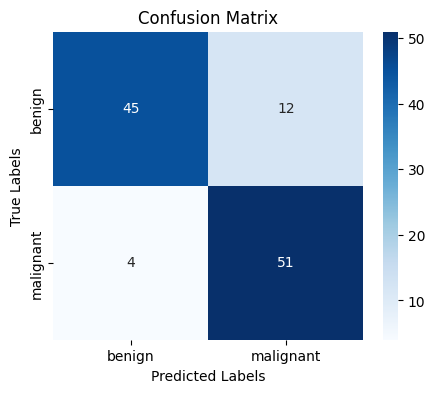

AUC: 0.9327
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


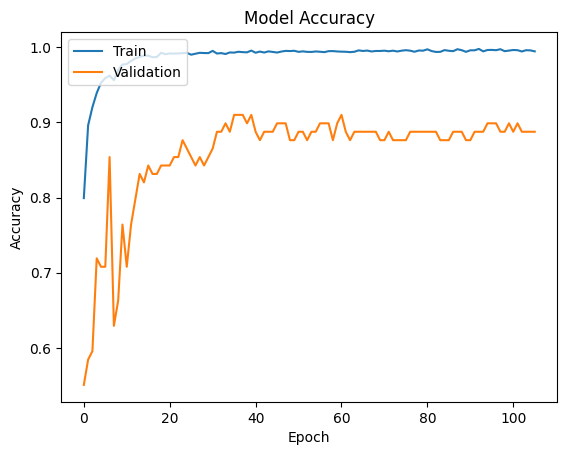

In [23]:
# Predictions
predictions = best_model1.predict([X_test_1, X_test_2, X_test_3, X_test_4, X_test_5,
                                   X_test_6, X_test_7, X_test_8, X_test_9, X_test_10, 
                                   X_test_11])

predicted_classes = (predictions > 0.5).astype(int)

# Classification Report with precision, recall, f1-score in 4 digits
class_names = ['benign', 'malignant']
report_dict = classification_report(y_test, predicted_classes, target_names=class_names, output_dict=True)

# Convert the report to a DataFrame and format the floating points
report_df = pd.DataFrame(report_dict).transpose()
report_df[['precision', 'recall', 'f1-score']] = report_df[['precision', 'recall', 'f1-score']].applymap(lambda x: f"{x:.4f}")

print("Classification Report:\n", report_df)

# Confusion Matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# AUC
auc_score = roc_auc_score(y_test, predictions)
print(f"AUC: {auc_score:.4f}")

# Summarize history for accuracy
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# try 2 (0.2 diff with no overlap)

In [24]:
def create_division(data, start, end):
    division = data.copy()
    division[(division > end)] = 1
    division = ((division - start) / (end - start)).clip(0, 1)
    return division

num_divisions = 5
start_range = 0.0
end_range = 1.0

# Training set divisions
X_train_divisions = [create_division(X_train, i * (end_range / num_divisions), 
                     (i + 1) * (end_range / num_divisions)) for i in range(num_divisions)]

# Naming the divisions as X_train_1, X_train_2, ..., X_train_5
for i in range(1, num_divisions + 1):
    locals()["X_train_" + str(i)] = X_train_divisions[i - 1]
    
# Validation set divisions
X_val_divisions = [create_division(X_val, i * (end_range / num_divisions), 
                    (i + 1) * (end_range / num_divisions)) for i in range(num_divisions)]

# Naming the divisions as X_val_1, X_val_2, ..., X_val_5
for i in range(1, num_divisions + 1):
    locals()["X_val_" + str(i)] = X_val_divisions[i - 1]
    
# Test set divisions
X_test_divisions = [create_division(X_test, i * (end_range / num_divisions), 
                   (i + 1) * (end_range / num_divisions)) for i in range(num_divisions)]
    
# Naming the divisions as X_test_1, X_test_2, ..., X_test_5
for i in range(1, num_divisions + 1):
    locals()["X_test_" + str(i)] = X_test_divisions[i - 1]
    
X_train_6= X_train.copy()
X_val_6= X_val.copy()
X_test_6= X_test.copy()

In [25]:
branch= 6

# Build model.
with strategy.scope():
    model=define_model2(branch)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.001,
    patience=5,
    min_lr=1e-6)

checkpoint_callback = ModelCheckpoint('HU2.h5', monitor='val_accuracy',save_best_only=True)

# Define the early stopping callback to stop training if validation loss does not improve
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=70)

BATCH_SIZE_TPU = BS * strategy.num_replicas_in_sync
    
history = model.fit([X_train_1, X_train_2, X_train_3, X_train_4, X_train_5,X_train_6], y_train, 
                    validation_data=([X_val_1, X_val_2, X_val_3, X_val_4, X_val_5,X_val_6], y_val), 
                    epochs=E, batch_size=BATCH_SIZE_TPU, callbacks=[checkpoint_callback, lr_callback,early_stopping_callback],verbose=0)

# Evaluate the model - report accuracy and capture it into a list for future reporting
best_model2 = tf.keras.models.load_model('HU2.h5')

    
loss2, accuracy2 = best_model2.evaluate([X_test_1, X_test_2, X_test_3, X_test_4, X_test_5,X_test_6], y_test)

print(f"accuracy: {accuracy2*100:.4f}")
print(f"loss: {loss2*100:.4f}")

2024-08-21 08:54:03.061116: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
2024-08-21 08:56:02.569016: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 6s 977ms/step - loss: 0.7877 - accuracy: 0.8482
accuracy: 84.8214
loss: 78.7653


4/4 [==============================] - 5s 984ms/step
Classification Report:
              precision  recall f1-score     support
benign          0.8846  0.8070   0.8440   57.000000
malignant       0.8167  0.8909   0.8522   55.000000
accuracy        0.8482  0.8482   0.8482    0.848214
macro avg       0.8506  0.8490   0.8481  112.000000
weighted avg    0.8512  0.8482   0.8480  112.000000


/tmp/ipykernel_13/2053711848.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  report_df[['precision', 'recall', 'f1-score']] = report_df[['precision', 'recall', 'f1-score']].applymap(lambda x: f"{x:.4f}")


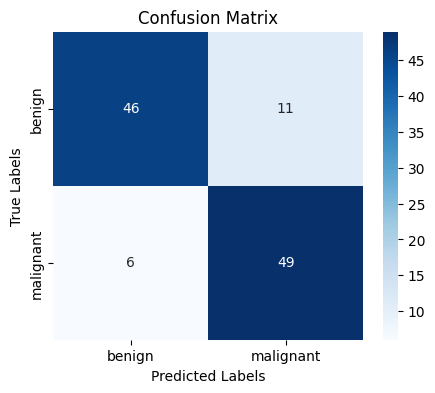

AUC: 0.8919
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


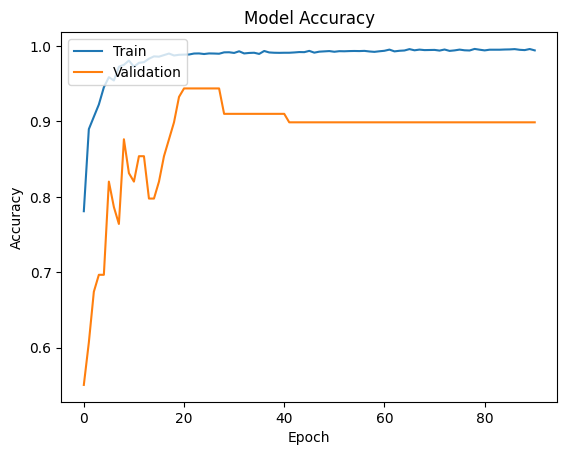

In [26]:
# Predictions
predictions = best_model2.predict([X_test_1, X_test_2, X_test_3, X_test_4, X_test_5, X_test_6])
predicted_classes = (predictions > 0.5).astype(int)

# Classification Report with precision, recall, f1-score in 4 digits
class_names = ['benign', 'malignant']
report_dict = classification_report(y_test, predicted_classes, target_names=class_names, output_dict=True)

# Convert the report to a DataFrame and format the floating points
report_df = pd.DataFrame(report_dict).transpose()
report_df[['precision', 'recall', 'f1-score']] = report_df[['precision', 'recall', 'f1-score']].applymap(lambda x: f"{x:.4f}")

print("Classification Report:\n", report_df)

# Confusion Matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# AUC
auc_score = roc_auc_score(y_test, predictions)
print(f"AUC: {auc_score:.4f}")

# Summarize history for accuracy
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# try 4 (0.5 diff with no overlap)

In [27]:
branch = 3

X_train_1 = X_train.copy()
X_train_1[X_train_1 > 0.5] = 1
X_train_1 = (X_train_1 / 0.5).clip(0, 1)

X_train_2 = X_train.copy()  # Make a copy to avoid modifying the original array
X_train_2 = ((X_train_2 - 0.5) / 0.5).clip(0, 1)
X_train_3 = X_train.copy()  



X_val_1 = X_val.copy()
X_val_1[X_val_1 > 0.5] = 1
X_val_1 = (X_val_1 / 0.5).clip(0, 1)

X_val_2 = X_val.copy()  # Make a copy to avoid modifying the original array
X_val_2 = ((X_val_2 - 0.5) / 0.5).clip(0, 1)
X_val_3 = X_val.copy()  



X_test_1 = X_test.copy()
X_test_1[X_test_1 > 0.5] = 1
X_test_1 = (X_test_1 / 0.5).clip(0, 1)

X_test_2 = X_test.copy()  # Make a copy to avoid modifying the original array
X_test_2 = ((X_test_2 - 0.5) / 0.5).clip(0, 1)
X_test_3 = X_test.copy()  


In [28]:
# Build model.
with strategy.scope():
    model=define_model2(branch)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.001,
    patience=5,
    min_lr=1e-6)

# Define the early stopping callback to stop training if validation loss does not improve
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=70)

checkpoint_callback = ModelCheckpoint('HU4.h5', monitor='val_accuracy',save_best_only=True)


BATCH_SIZE_TPU = BS * strategy.num_replicas_in_sync
    
history = model.fit([X_train_1, X_train_2, X_train_3], y_train, 
                    validation_data=([X_val_1, X_val_2, X_val_3], y_val), 
                    epochs=E, batch_size=BATCH_SIZE_TPU, callbacks=[checkpoint_callback, lr_callback,early_stopping_callback],verbose=0)

# Evaluate the model - report accuracy and capture it into a list for future reporting
best_model4 = tf.keras.models.load_model('HU4.h5')

    
loss4, accuracy4 = best_model4.evaluate([X_test_1, X_test_2, X_test_3], y_test)

print(f"accuracy: {accuracy4*100:.4f}")
print(f"loss: {loss4*100:.4f}")


2024-08-21 09:25:20.306574: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
2024-08-21 09:26:30.435577: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 3s 501ms/step - loss: 0.6263 - accuracy: 0.8661
accuracy: 86.6071
loss: 62.6316


4/4 [==============================] - 3s 479ms/step
Classification Report:
              precision  recall f1-score     support
benign          0.9200  0.8070   0.8598   57.000000
malignant       0.8226  0.9273   0.8718   55.000000
accuracy        0.8661  0.8661   0.8661    0.866071
macro avg       0.8713  0.8671   0.8658  112.000000
weighted avg    0.8722  0.8661   0.8657  112.000000


/tmp/ipykernel_13/3673021730.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  report_df[['precision', 'recall', 'f1-score']] = report_df[['precision', 'recall', 'f1-score']].applymap(lambda x: f"{x:.4f}")


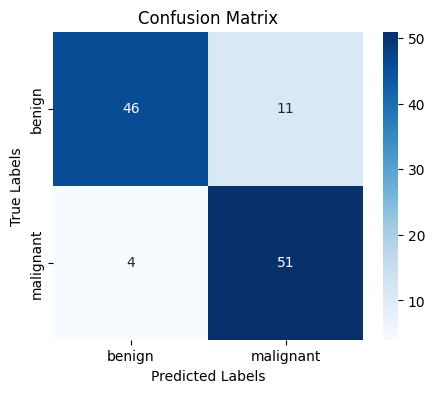

AUC: 0.9206
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


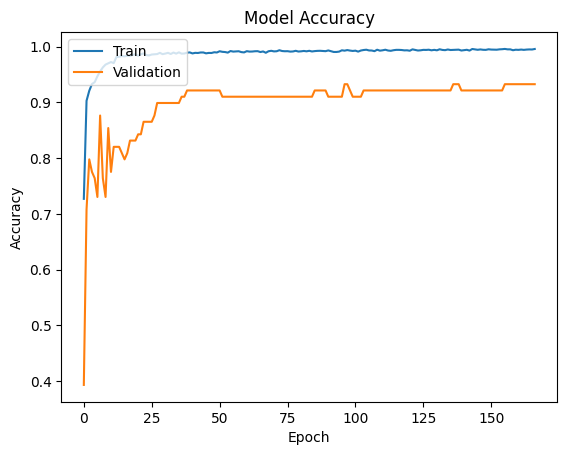

In [29]:
# Predictions
predictions = best_model4.predict([X_test_1, X_test_2, X_test_3])
predicted_classes = (predictions > 0.5).astype(int)

# Classification Report with precision, recall, f1-score in 4 digits
class_names = ['benign', 'malignant']
report_dict = classification_report(y_test, predicted_classes, target_names=class_names, output_dict=True)

# Convert the report to a DataFrame and format the floating points
report_df = pd.DataFrame(report_dict).transpose()
report_df[['precision', 'recall', 'f1-score']] = report_df[['precision', 'recall', 'f1-score']].applymap(lambda x: f"{x:.4f}")

print("Classification Report:\n", report_df)

# Confusion Matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# AUC
auc_score = roc_auc_score(y_test, predictions)
print(f"AUC: {auc_score:.4f}")

# Summarize history for accuracy
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [30]:
print(f"HU Accuracy (0.1 diff without overlap): {accuracy1*100:.4f}")
print(f"HU Accuracy (0.2 diff without overlap): {accuracy2*100:.4f}")
print(f"HU Accuracy (0.5 diff without overlap): {accuracy4*100:.4f}")


HU Accuracy (0.1 diff without overlap): 85.7143
HU Accuracy (0.2 diff without overlap): 84.8214
HU Accuracy (0.5 diff without overlap): 86.6071
